In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_iris
import csv

In [2]:
bitcoin = pd.read_csv('Data/B_C_H.csv')
gpu = pd.read_csv('Data/Gpu20-21.csv')
cpu = pd.read_csv('Data/Cpu20-21.csv')

In [3]:
gpu

,Unnamed: 0,AMD,INTEL,NVIDIA,OTHER
0,Enero 2020,15.28,9.60,74.96,0.16
1,Febrero 2020,15.74,9.74,74.38,0.14
2,Marzo 2020,13.38,8.60,77.87,0.15
3,Abril 2020,15.85,10.73,73.28,0.14
4,Mayo 2020,15.98,10.63,73.23,0.16
5,Junio 2020,16.23,10.10,73.53,0.14
6,Julio 2020,16.04,9.55,74.27,0.14
7,Agosto 2020,16.25,9.80,73.82,0.13
8,Septiembre 2020,16.29,9.71,73.88,0.12
9,Octubre 2020,16.08,9.51,74.29,0.12


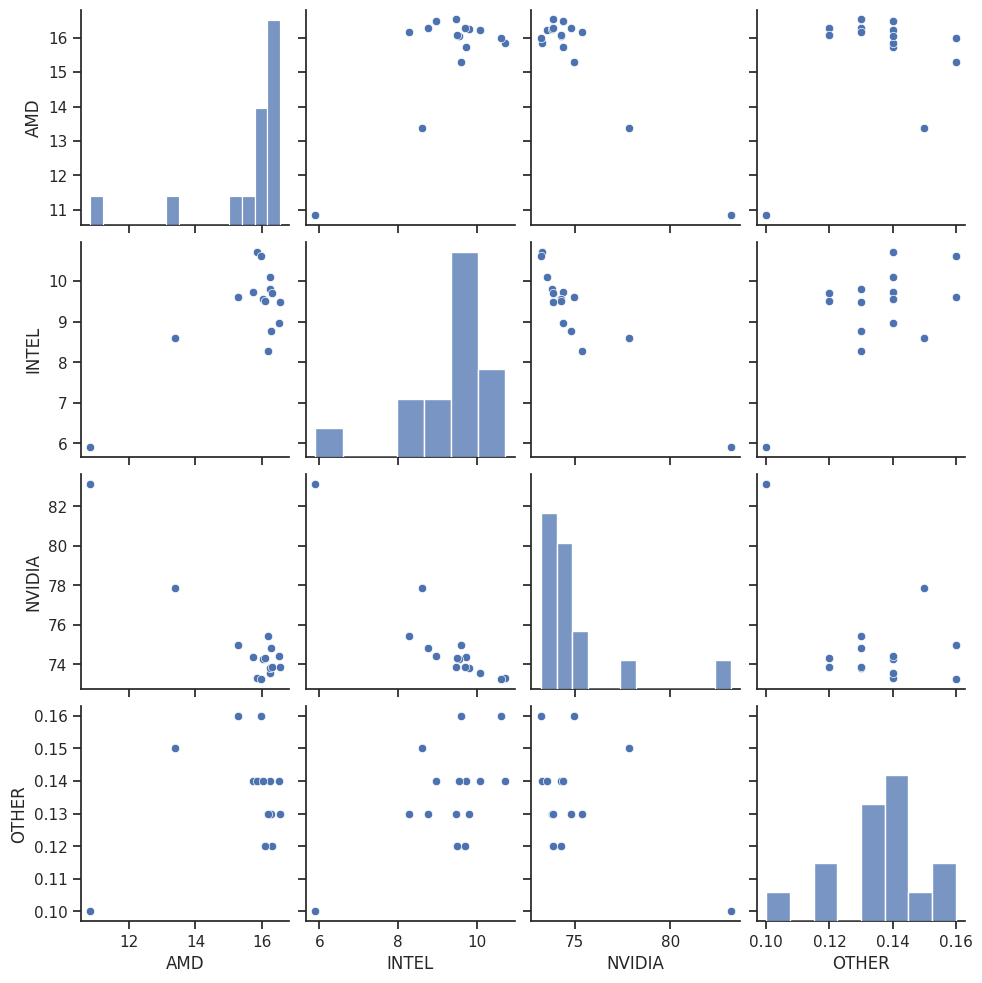

In [4]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(gpu)

plt.show();

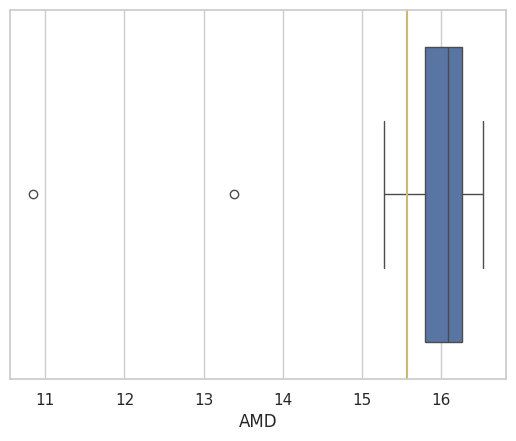

In [5]:
sns.set(style="whitegrid")
sns.boxplot(x=gpu['AMD'])
plt.axvline(gpu['AMD'].mean(), c='y');

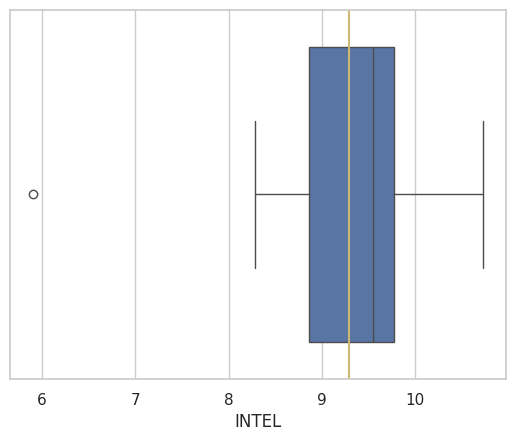

In [6]:
sns.set(style="whitegrid")
sns.boxplot(x=gpu['INTEL'])
plt.axvline(gpu['INTEL'].mean(), c='y');

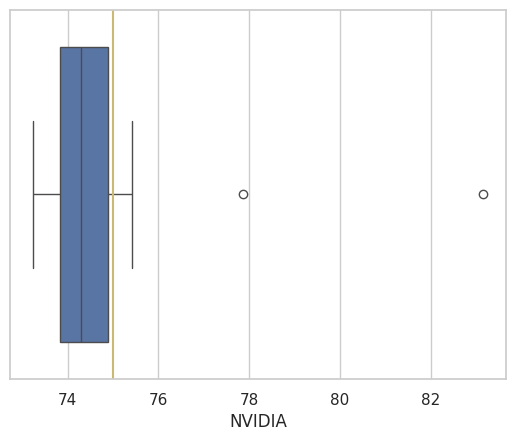

In [7]:
sns.set(style="whitegrid")
sns.boxplot(x=gpu['NVIDIA'])
plt.axvline(gpu['NVIDIA'].mean(), c='y');

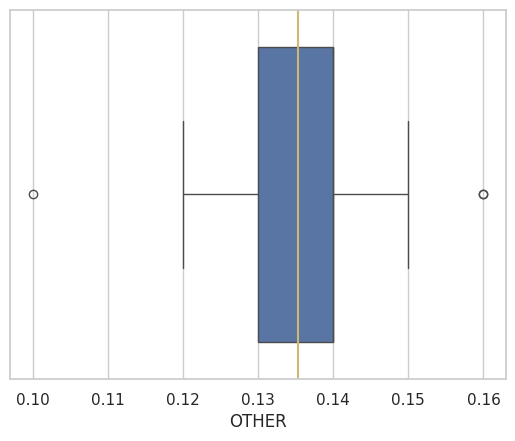

In [8]:
sns.set(style="whitegrid")
sns.boxplot(x=gpu['OTHER'])
plt.axvline(gpu['OTHER'].mean(), c='y');

In [9]:
bitcoin.head()

,Date,Price,Open,High,Low,Volume,Change
0,"Apr 25, 2021","49,561.90","50,088.20","50,438.80","49,226.50",66.26K,-1.05%
1,"Apr 24, 2021","50,088.90","51,140.80","51,183.00","48,775.20",82.25K,-2.06%
2,"Apr 23, 2021","51,143.60","51,707.10","52,099.90","47,659.40",214.46K,-1.13%
3,"Apr 22, 2021","51,729.50","53,821.30","55,408.40","50,590.90",168.13K,-3.88%
4,"Apr 21, 2021","53,820.20","56,479.50","56,764.40","53,657.60",100.26K,-4.71%


In [10]:
bitcoin['Price'].replace(',','', regex=True, inplace=True)
bitcoin['Volume'].replace('K','', regex=True, inplace=True)
bitcoin['Volume'].replace('M','', regex=True, inplace=True)
bitcoin['Volume'].replace('-','0', regex=True, inplace=True)
bitcoin['Change'].replace('%','', regex=True, inplace=True)

In [11]:
bitcoin.head()

,Date,Price,Open,High,Low,Volume,Change
0,"Apr 25, 2021",49561.90,"50,088.20","50,438.80","49,226.50",66.26,-1.05
1,"Apr 24, 2021",50088.90,"51,140.80","51,183.00","48,775.20",82.25,-2.06
2,"Apr 23, 2021",51143.60,"51,707.10","52,099.90","47,659.40",214.46,-1.13
3,"Apr 22, 2021",51729.50,"53,821.30","55,408.40","50,590.90",168.13,-3.88
4,"Apr 21, 2021",53820.20,"56,479.50","56,764.40","53,657.60",100.26,-4.71


In [12]:
bitcoin['Price'] = bitcoin['Price'].astype(float)
bitcoin['Volume'] = bitcoin['Volume'].astype(float)
bitcoin['Volume'] = bitcoin['Volume'].astype(int)
bitcoin['Change'] = bitcoin['Change'].astype(float)
bitcoin['Change'] = bitcoin['Change'].astype(int)

In [13]:
bitcoin.shape

(3935, 7)

In [14]:
bitcoin.head()

,Date,Price,Open,High,Low,Volume,Change
0,"Apr 25, 2021",49561.9,"50,088.20","50,438.80","49,226.50",66,-1
1,"Apr 24, 2021",50088.9,"51,140.80","51,183.00","48,775.20",82,-2
2,"Apr 23, 2021",51143.6,"51,707.10","52,099.90","47,659.40",214,-1
3,"Apr 22, 2021",51729.5,"53,821.30","55,408.40","50,590.90",168,-3
4,"Apr 21, 2021",53820.2,"56,479.50","56,764.40","53,657.60",100,-4


In [15]:
bitcoin.describe().iloc[:2,:7]

,Price,Volume,Change
count,3935.000000,3935.000000,3935.00000
mean,4334.106912,136.458196,0.46709


In [16]:
b_coin = bitcoin.dropna(axis=1).reset_index(drop=True)

In [17]:
b_coin.isnull().any()

Date      False
Price     False
Open      False
High      False
Low       False
Volume    False
Change    False
dtype: bool

In [18]:
b_coin.describe().iloc[:2,:7]

,Price,Volume,Change
count,3935.000000,3935.000000,3935.00000
mean,4334.106912,136.458196,0.46709


In [19]:
bitcoin_Vol = b_coin.drop(['Date','Open','High','Low','Change'],1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
bitcoin_Ch = b_coin.drop(['Date','Open','High','Low','Volume'],1)

In [ ]:
b_pv = pd.DataFrame(bitcoin_Vol)
b_pc = pd.DataFrame(bitcoin_Ch)

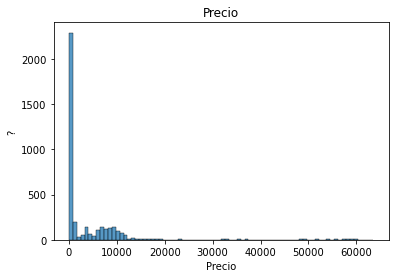

In [ ]:
ax = sns.histplot(b_coin['Price'])
ax.set(title='Precio', xlabel='Precio', ylabel='?');

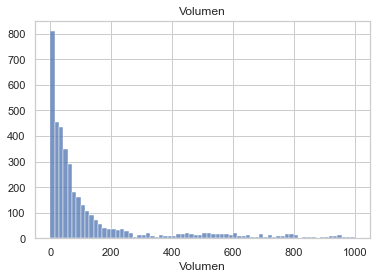

In [ ]:
ax = sns.histplot(b_coin['Volume'])
ax.set(title='Volumen', xlabel='Volumen', ylabel='');

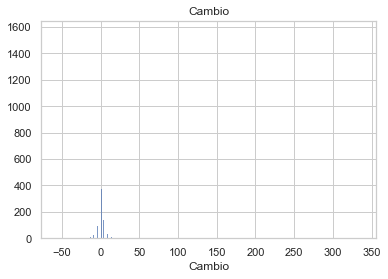

In [ ]:
ax = sns.histplot(b_coin['Change'])
ax.set(title='Cambio', xlabel='Cambio', ylabel='');

In [ ]:
b_pc.shape

(3935, 2)

In [ ]:
b_pc

,Price,Change
0,49561.9,-1
1,50088.9,-2
2,51143.6,-1
3,51729.5,-3
4,53820.2,-4
...,...,...
3930,0.1,0
3931,0.1,0
3932,0.1,0
3933,0.1,0


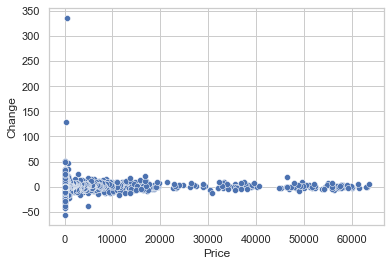

In [ ]:
sns.scatterplot(x = b_pc['Price'], y = b_pc['Change']);

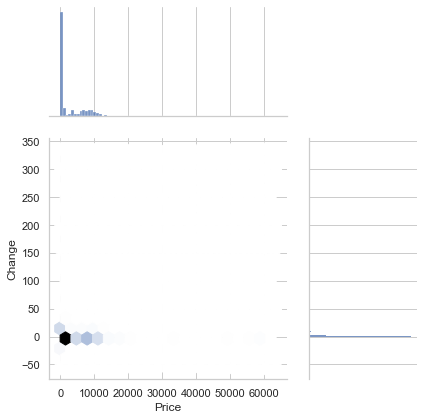

In [ ]:
sns.jointplot(x='Price', y='Change', data=b_pc, kind='hex', ratio=2, joint_kws={'gridsize': 20});

In [ ]:
b_pv

,Price,Volume
0,49561.9,66
1,50088.9,82
2,51143.6,214
3,51729.5,168
4,53820.2,100
...,...,...
3930,0.1,2
3931,0.1,0
3932,0.1,0
3933,0.1,0


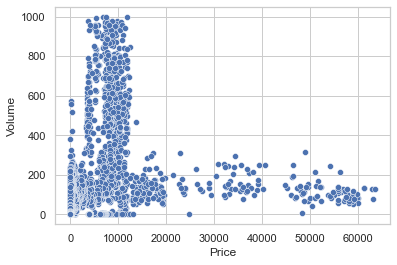

In [ ]:
sns.scatterplot(x = b_pv['Price'], y = b_pv['Volume']);

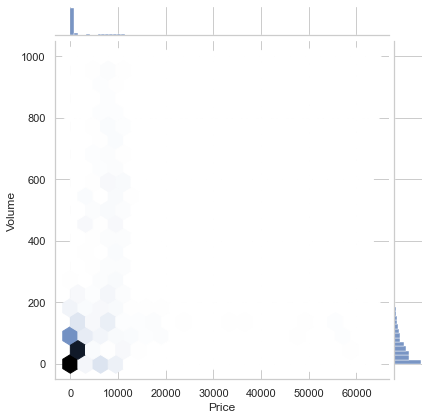

In [ ]:
sns.jointplot(x='Price', y='Volume', data=b_pv, kind='hex', ratio=10, joint_kws={'gridsize': 20});

In [ ]:
X = b_pv.drop(columns=['Volume'])
y = b_pv['Volume']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
log_reg = LogisticRegression(solver='lbfgs',max_iter=1000000)

In [ ]:
X_train

,Price
562,8267.8
1788,537.1
1619,747.0
2756,136.5
3380,6.4
...,...
3083,11.2
244,11753.5
2582,444.7
165,15695.8


In [ ]:
y_test

3202     48
3869      5
122     104
1696     26
3098     40
       ... 
2311     21
792     727
3105     21
3048     32
2808     12
Name: Volume, Length: 1181, dtype: int32

In [ ]:
log_reg.fit(X_train, y_train)

D:\Users\aeln8\anaconda3\envs\Bedu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000000)

In [ ]:
y_pred = log_reg.predict(X_test)

y_pred

array([4, 4, 1, ..., 4, 4, 4])

In [ ]:
log_reg.score(X_test, y_test)

0.04233700254022015

In [ ]:
y_pred_proba = log_reg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[1.24980104e-02, 1.09430873e-02, 2.45102653e-02, ...,
        7.04274246e-04, 6.34360107e-04, 6.85806366e-04],
       [1.25484629e-02, 1.08407283e-02, 2.43249052e-02, ...,
        6.98627824e-04, 6.28728339e-04, 6.80075704e-04],
       [1.35333318e-17, 6.25273477e-02, 1.07372310e-03, ...,
        1.06182113e-04, 9.92851831e-04, 2.59679377e-04],
       ...,
       [1.10625325e-02, 1.14579765e-02, 2.50899812e-02, ...,
        7.25078138e-04, 6.60228678e-04, 7.09088170e-04],
       [3.10581808e-03, 1.61417469e-02, 2.84505344e-02, ...,
        8.68742083e-04, 8.77970011e-04, 8.85167158e-04],
       [3.29024021e-08, 4.12218607e-02, 1.37126863e-02, ...,
        6.39248910e-04, 1.43926469e-03, 8.92705842e-04]])

In [ ]:
X_a = b_pc.drop(columns=['Change'])
y_a = b_pc['Change']

In [ ]:
X_traina, X_testa, y_traina, y_testa = train_test_split(X_a, y_a, test_size=0.3)
log_reg_a = LogisticRegression(solver='lbfgs',max_iter=10000000)

In [ ]:
log_reg_a.fit(X_traina, y_traina)

D:\Users\aeln8\anaconda3\envs\Bedu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000000)

In [ ]:
y_pred_a = log_reg_a.predict(X_testa)

y_pred_a

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
log_reg_a.score(X_testa, y_testa)

0.3810330228619814

In [ ]:
bitcoin_f = b_coin.drop(['Volume','Open','High','Low','Change'],1)
b_fp = pd.DataFrame(bitcoin_f)

In [ ]:
b_fp

,Date,Price
0,"Apr 25, 2021",49561.9
1,"Apr 24, 2021",50088.9
2,"Apr 23, 2021",51143.6
3,"Apr 22, 2021",51729.5
4,"Apr 21, 2021",53820.2
...,...,...
3930,"Jul 22, 2010",0.1
3931,"Jul 21, 2010",0.1
3932,"Jul 20, 2010",0.1
3933,"Jul 19, 2010",0.1


In [ ]:
indexed_df = b_fp.set_index('Date')

In [ ]:
ts = indexed_df['Price']

In [ ]:
ts.head()

Date
Apr 25, 2021    49561.9
Apr 24, 2021    50088.9
Apr 23, 2021    51143.6
Apr 22, 2021    51729.5
Apr 21, 2021    53820.2
Name: Price, dtype: float64

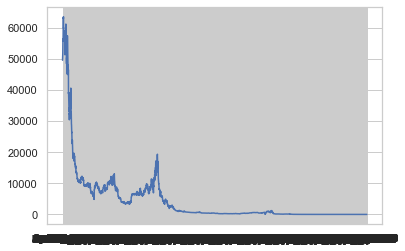

In [ ]:
plt.plot(ts);

In [ ]:
df1 = pd.read_csv('Data/difficulty.csv')

In [ ]:
df1

,Timestamp,difficulty
0,2009-01-02 23:00:00,1.000000e+00
1,2009-01-05 23:00:00,0.000000e+00
2,2009-01-08 23:00:00,1.000000e+00
3,2009-01-11 23:00:00,1.000000e+00
4,2009-01-14 23:00:00,1.000000e+00
...,...,...
1504,2021-05-12 00:00:00,2.060885e+13
1505,2021-05-15 00:00:00,2.504649e+13
1506,2021-05-18 00:00:00,2.504649e+13
1507,2021-05-21 00:00:00,2.504649e+13


In [ ]:
indexed_df1 = df1.set_index('Timestamp')
ts_1 = indexed_df1['difficulty']
ts_1.tail()

Timestamp
2021-05-12 00:00:00    2.060885e+13
2021-05-15 00:00:00    2.504649e+13
2021-05-18 00:00:00    2.504649e+13
2021-05-21 00:00:00    2.504649e+13
2021-05-24 00:00:00    2.504649e+13
Name: difficulty, dtype: float64

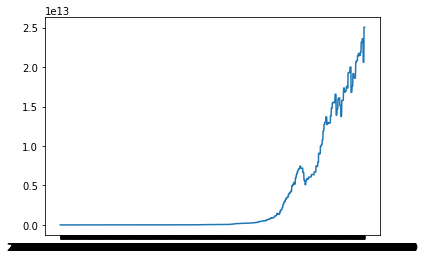

In [ ]:
plt.plot(ts_1);

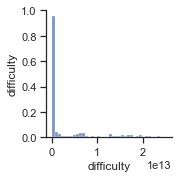

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df1)

plt.show();

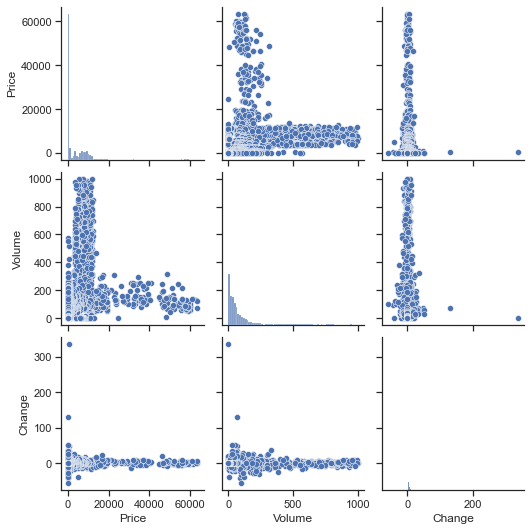

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(bitcoin)

plt.show();

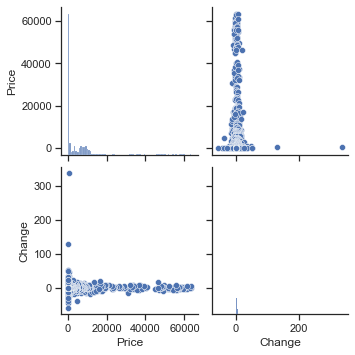

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(b_pc)

plt.show();

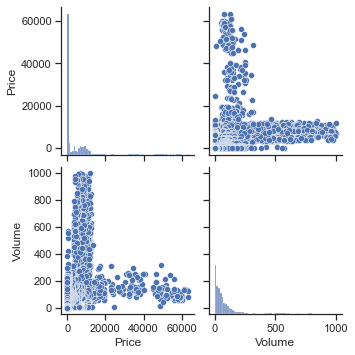

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(b_pv)

plt.show();

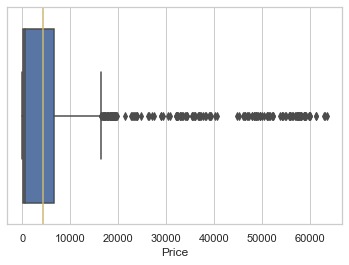

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=b_coin['Price'])
plt.axvline(b_coin['Price'].mean(), c='y');

In [ ]:
iqr = b_coin['Price'].quantile(0.75) - b_coin['Price'].quantile(0.25)
filtro_inferior = b_coin['Price'] > b_coin['Price'].quantile(0.25) - (iqr * 1.5)
filtro_superior = b_coin['Price'] < b_coin['Price'].quantile(0.75) + (iqr * 1.5)

df_filtrado = b_coin[filtro_inferior & filtro_superior]

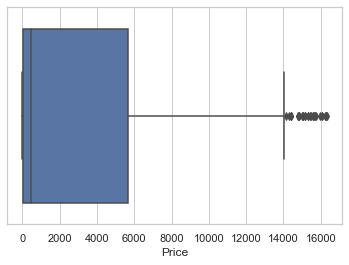

In [ ]:
sns.boxplot(x = df_filtrado['Price']);

In [ ]:
b_coin['Price'].std()

8888.395158961688

In [ ]:
print(f'Valor mínimo: {b_coin["Price"].min()}')
print(f'Percentil 10: {b_coin["Price"].quantile(0.1)}')
print(f'Percentil 25: {b_coin["Price"].quantile(0.25)}')
print(f'Percentil 50: {b_coin["Price"].median()}')
print(f'Percentil 75: {b_coin["Price"].quantile(0.75)}')
print(f'Percentil 90: {b_coin["Price"].quantile(0.9)}')
print(f'Valor máximo: {b_coin["Price"].max()}')

Valor mínimo: 0.1
Percentil 10: 4.7
Percentil 25: 72.55
Percentil 50: 567.6
Percentil 75: 6583.55
Percentil 90: 10333.539999999999
Valor máximo: 63540.9


In [ ]:
print("Asimetria", skew(b_coin['Price']))
print("Curtosis", kurtosis(b_coin['Price']))

Asimetria 4.064409158222163
Curtosis 19.267446988501476


In [ ]:
df2 = pd.read_csv('Data/hash-rate.csv')
df3 = pd.read_csv('Data/miners-revenue.csv')
df4 = pd.read_csv('Data/nvts.csv')

In [ ]:
df4

,Timestamp,nvts
0,2020-05-25 18:59:50,21.443114
1,2020-05-26 02:52:08,21.392832
2,2020-05-26 10:46:37,21.396282
3,2020-05-26 18:11:34,21.217663
4,2020-05-26 23:33:46,21.279794
...,...,...
1509,2021-05-24 11:25:54,7.336834
1510,2021-05-24 16:45:53,7.563018
1511,2021-05-24 23:08:32,7.743362
1512,2021-05-25 05:30:58,7.739401


In [ ]:
indexed_df2 = df2.set_index('Timestamp')
ts_2 = indexed_df2['hash-rate']
ts_2.tail()

Timestamp
2021-05-12 00:00:00    1.762091e+08
2021-05-15 00:00:00    1.531433e+08
2021-05-18 00:00:00    1.245068e+08
2021-05-21 00:00:00    1.369574e+08
2021-05-24 00:00:00    1.568785e+08
Name: hash-rate, dtype: float64

In [ ]:
indexed_df3 = df3.set_index('Timestamp')
ts_3 = indexed_df3['miners-revenue']
ts_3.tail()

Timestamp
2021-05-11 00:00:00    6.460730e+07
2021-05-14 00:00:00    4.565293e+07
2021-05-17 00:00:00    3.687539e+07
2021-05-20 00:00:00    3.313554e+07
2021-05-23 00:00:00    2.894416e+07
Name: miners-revenue, dtype: float64

In [ ]:
indexed_df4 = df4.set_index('Timestamp')
ts_4 = indexed_df4['nvts']
ts_4.tail()

Timestamp
2021-05-24 11:25:54    7.336834
2021-05-24 16:45:53    7.563018
2021-05-24 23:08:32    7.743362
2021-05-25 05:30:58    7.739401
2021-05-25 12:24:27    7.376205
Name: nvts, dtype: float64

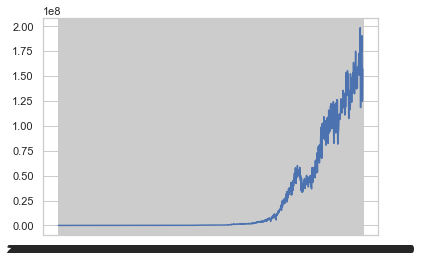

In [ ]:
plt.plot(ts_2);

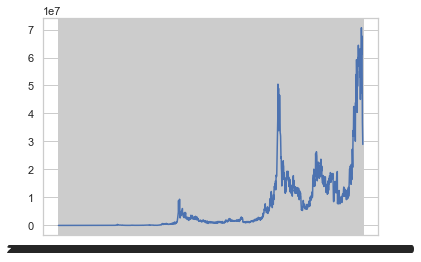

In [ ]:
plt.plot(ts_3);

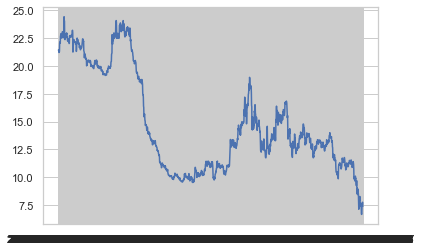

In [ ]:
plt.plot(ts_4);

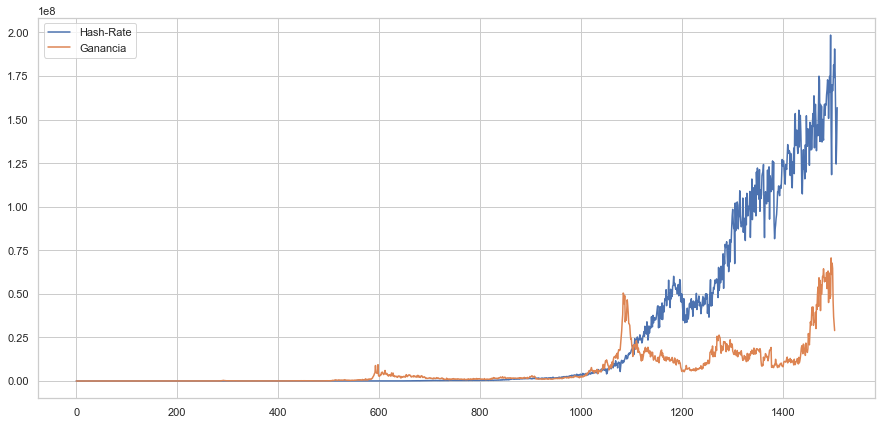

In [ ]:
df2['hash-rate'].plot(label='Hash-Rate',figsize=(15,7))
df3['miners-revenue'].plot(label='Ganancia')
plt.legend();

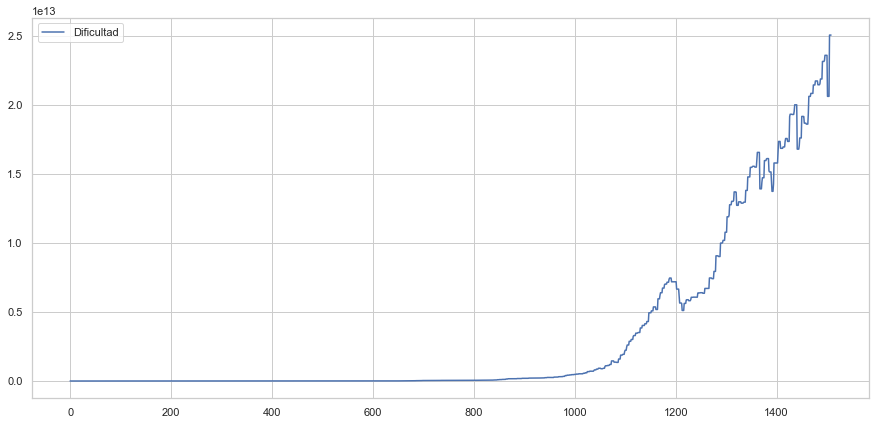

In [ ]:
df1['difficulty'].plot(label='Dificultad',figsize=(15,7))
plt.legend();

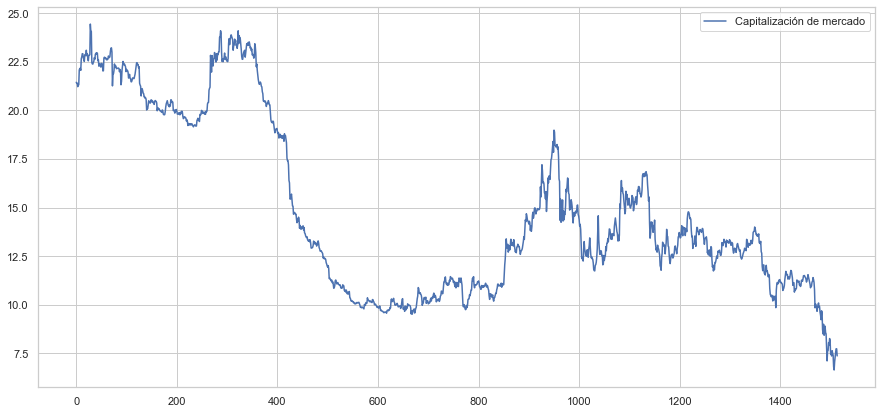

In [ ]:
df4['nvts'].plot(label='Capitalización de mercado',figsize=(15,7))
plt.legend();